# Investigating the Titanic Dataset
## Data Investigation Project
#### Data Analyst Nanodegree (Udacity)
Project submission by Edward Minnett (ed@methodic.io).

March 19th 2016. (Revision 1)

----------

## Load the Data and Perform an Initial Investigation

In [1]:
import pandas as pd
import numpy as np

titanic_df = pd.read_csv('./titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


The following is a description of the variables in this dataset. This description has been copied from the data source found at Kaggle.com (https://www.kaggle.com/c/titanic/data).

**VARIABLE DESCRIPTIONS:**
- survival       - Survival (0 = No; 1 = Yes)
- pclass         - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name           - Name
- sex            - Sex
- age            - Age
- sibsp          - Number of Siblings/Spouses Aboard
- parch          - Number of Parents/Children Aboard
- ticket         - Ticket Number
- fare           - Passenger Fare
- cabin          - Cabin
- embarked       - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES:**

Pclass is a proxy for socio-economic status (SES) - 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1) - If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

- Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
- Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
- Parent:   Mother or Father of Passenger Aboard Titanic
- Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Questions to Investigate

- What are the extrema in age and fare for passenegers who survived or didn't survive? Who are these passengers?
- Is there a relationship between socio-economic status and the size of families aboard the Titanic?
- Is there a relationship between socio-economic status and where the passengers embarked?
- Were passengers with higher socio-economic status more likely to survive?
- Were men or women more likely to survive?
- Were passengers of certain ages likely to survive?
- Is a passeneger's socio-economic status, gender, or age the better indicator of their survival?

## Wrangle and Tidy the Data

In [2]:
import math

def age_to_decade_category(age):
    if str(age) == 'nan': 
        return '?'
    floor = int(math.floor(age/10.0) * 10)
    return str(floor) + 's'

# The modified Titanic DataFrame.
mod_titanic_df = titanic_df.copy()

# Create a single column for family size aboard the Titanic that is the sum of siblings and parents.
mod_titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Decade of age (leading digit of two digit age) with a '?' for unknown ages.
mod_titanic_df['AgeByDecade'] = titanic_df['Age']
mod_titanic_df['AgeByDecade'] = mod_titanic_df['AgeByDecade'].apply(age_to_decade_category)

# Correct the order of the columns
columns = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'AgeByDecade',
          'SibSp', 'Parch', 'FamilySize', 'Ticket', 'Fare', 'Embarked']
mod_titanic_df = mod_titanic_df[columns]

mod_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,20s,1,0,1,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,30s,1,0,1,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,20s,0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,30s,1,0,1,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,30s,0,0,0,373450,8.0500,S


## What are the extrema in age and fare for passenegers who survived or didn't survive? Who are these passengers?

In [3]:
from IPython.display import display

def passenger_by_survival_and_variable_extrema(survived, variable, extrema):
    survival_filter = mod_titanic_df['Survived'] == survived
    extrema_value   = getattr(mod_titanic_df[survival_filter][variable], extrema)()
    query_string    = str(variable) + ' == ' + str(extrema_value)
    passenger       = mod_titanic_df[survival_filter].query(query_string)
    
    return passenger

def age_and_fare_exterma_analysis_by_survival(survived):
    survival_wording = 'survived' if survived else 'did not survive'
    print "The oldest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'max'))
    print"\n"
    print "The youngest passeneger(s) who %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Age', 'min'))
    print"\n"
    print "The passeneger(s) who paid the most and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'max'))
    print"\n"
    print "The passeneger(s) who paid the least and %(survival_wording)s:" % locals()
    display(passenger_by_survival_and_variable_extrema(survived, 'Fare', 'min'))

#### Extrema for passenegers who survived.

In [4]:
age_and_fare_exterma_analysis_by_survival(survived=1)

The oldest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,80s,0,0,0,27042,30,S




The youngest passeneger(s) who survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0s,0,1,1,2625,8.5167,C




The passeneger(s) who paid the most and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35,30s,0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,30s,0,1,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35,30s,0,0,0,PC 17755,512.3292,C




The passeneger(s) who paid the least and survived:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25,20s,0,0,0,LINE,0,S


#### Extrema for passenegers who did not survive.

In [5]:
age_and_fare_exterma_analysis_by_survival(survived=0)

The oldest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74,70s,0,0,0,347060,7.775,S




The youngest passeneger(s) who did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1,0s,4,1,5,3101295,39.6875,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1,0s,5,2,7,CA 2144,46.9000,S




The passeneger(s) who paid the most and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19,10s,3,2,5,19950,263,S
438,439,0,1,"Fortune, Mr. Mark",male,64,60s,1,4,5,19950,263,S




The passeneger(s) who paid the least and did not survive:


,PassengerId,Survived,Pclass,Name,Sex,Age,AgeByDecade,SibSp,Parch,FamilySize,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,30s,0,0,0,LINE,0,S
263,264,0,1,"Harrison, Mr. William",male,40,40s,0,0,0,112059,0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,?,0,0,0,239853,0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,10s,0,0,0,LINE,0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,?,0,0,0,239853,0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,?,0,0,0,239853,0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,?,0,0,0,239854,0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,40s,0,0,0,LINE,0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,?,0,0,0,112052,0,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,?,0,0,0,239856,0,S


It is surprising that there are so many passengers whose fare was 0. It is less surprisng that there are passengers with unkown ages, but fare prices should not have been 'lost' so the 0 values are less likely to be a result of bad data. Upon doing some further research, it appears that there were passenegers who effectively received free tickets though it is still surprising that some of these passengers received free tickets for first class acommodation. Some of the se passenegers were under the employment of other passenegers (servants and butlers), but perhaps more interestingly there were a handlful of passenegers who were sent by Harland & Wolff who built the Titanic [1].

Other patterns in the extrema are vary in how surprising they are. It is expected that the passeneger who paid the most have the highest socio-economic status and it is rather telling, though not surprising, that the oldest passeneger to survive has high socio-economic status while the oldest passeneger who did not survive had low socio-economic status. What is more surprising is that 24 of the 25 passenegers represented in this extrema analysis are male. It is not entirely clear why this. Later analysis will show that there are more males in this dataset than females, but not matching these proportions.

## Set Up Code to Support the Analysis of Two Categorical Variables

In [6]:
import seaborn as sns
from scipy.stats import chisquare, chi2_contingency, norm
%matplotlib inline

def descriptive_statistics_of_numeric_series(var, label, df=mod_titanic_df):
    """ Simple descriptive analysis of the numeric values for the series df[var]."""
    series = df[var]
    print "Summary Statistics for " + label
    print "Median: " + str(series.median())
    print "Mean: " + str(series.mean())
    print "Standard Deviation: " + str(series.std())
    print "\n"

    
def visual_analysis_of_two_categorical_variables(var_a, var_b, df=mod_titanic_df):
    """ Produces a 3 part plot. The left most plot illustrates the counts for each sorted unique 
    value in df[var_a]. The right most plot is exactly like the first plot except for var_b. 
    The middle plot is a violin plot illustrating the relationship between var_a and var_b. 
    Violin plots are particularly good at illustrating the relative magnitude of the frequencies 
    for combinations of categorical values.    
    """
    series_a = df[var_a].sort_values()
    series_b = df[var_b].sort_values()
    colour_palette = "GnBu_d"
    sns.plt.figure(figsize=(16, 6))
    sns.plt.subplot(1,3,1)
    sns.plt.title("Count Plot for '" + var_a + "'")
    sns.countplot(series_a, palette=colour_palette)
    sns.plt.subplot(1,3,2)
    sns.plt.title("'" + var_a + "' vs '" + var_b + "' Violin Plot")
    sns.violinplot(x=series_a, y=series_b, palette=colour_palette, inner="stick");
    sns.plt.subplot(1,3,3)
    sns.plt.title("Count Plot for '" + var_b + "'")
    sns.countplot(series_b, palette=colour_palette)
    sns.plt.tight_layout()
    sns.plt.show()
    

def table_of_frequencies(var_a, var_b, df=mod_titanic_df, margins=False, normalise=False, axis='columns'):
    """ Creates a contingency table of the frequency of records that match the combination of features 
    represented by the intersection of rows and columns. The contingency table can be very valuable when 
    investigating the exact values that define the relationship between the two given variables [2].
    
    If margins is True, the sum for each row, column and the grand total will be included. 
    If normalise and margins are True, the frequencies will be normalised so that the sum is 1. 
    By default, this normalisation is performed so that way the column sums are 1. 
    Axis can be set to 'rows' to normalise so that the row sums are 1.
    """
    freq_tab = df.pivot_table(index=var_a, columns=var_b, values='PassengerId', 
                                margins=margins, fill_value=0, aggfunc=lambda x: len(x.unique()))
    if normalise and margins:
        if axis == 'columns':
            freq_tab = freq_tab.div(freq_tab.iloc[-1:].values[0])
        elif axis == 'rows':
            freq_tab = freq_tab.div(freq_tab.iloc[:,-1], axis=0)
    
    return freq_tab


def chi_squared_and_carmers_v_anlysis(var_a, var_b, df=mod_titanic_df):
    """ Performs a χ² test of independence with an alpha level of 0.001. χ² are particularly well suited for 
    analysing the independence of categorical data [3]. Given that nearly all of the data analysed to answer 
    the exploratory questions are categorical, it was decided this was the most suitable test to perform. 
    This function includes the results of a Cramer's V measure of association.
    """
    vars_str = var_a + " and " + var_b
    freq_tab = table_of_frequencies(var_a, var_b, df)
    alpha = 0.001
    conf = (1 - alpha)*100
    print "χ²: " + vars_str
    print "H0: The null hypothesis for this χ² test is that " + vars_str + " are independent of each other."
    print "HA: The alternative hypothesis for this χ² test is that " + vars_str + " are in some way dependent."
    print ("For this test, we are considering an alpha level " + str(alpha) + " allowing for " + str(conf) + "% " +
        "level of confidence.")
    chi2, p, dof, ex = chi2_contingency(freq_tab)
    dof_label = ("degree" if dof == 1 else "degrees") + " of freedom"
    outcome = ("With a p-value of " + str(p) + " and a χ² statistic of " + str(chi2) + " with " + 
        str(dof) + " " + dof_label  + " we\n")
    reject_null = p < alpha
    if reject_null:
        outcome += "reject the null hypothesis and accept that " + vars_str + " are in some way dependent [3]."
    else:
        outcome += "fail to reject the null hypothesis that " + vars_str + " are independent [3]."
    hr = "-----------------------------------------------------------------------------------------------------"
    print hr
    print outcome
    print hr
    print cramers_v_anlysis(vars_str, chi2, freq_tab.shape, df)
    print hr


def cramers_v_anlysis(vars_str, chi2, pivot_table_shape, df=mod_titanic_df):    
    """ Calculates Cramer's V measure of association [4]. Once the χ² statistic and Cramer's V measure are claculated, 
    it is important to be able to interpret their meaning relative to the data analysed. This interpretation takes 
    the form of Cohen' guidlines for effect size [5].
    """
    V = math.sqrt(chi2 / len(df) / (min(pivot_table_shape) - 1))
    response = ("The Cramer's V measure of association for " + vars_str + " has a value of " + str(V) + "\n" +
        "equating to a ")
    if V < 0.1: response += "ineffectual"
    elif V < 0.2: response += "small"
    elif V < 0.3: response += "small to medium"
    elif V < 0.4: response += "medium"
    elif V < 0.5: response += "medium to large"
    else: response += "large"
    response += " effect size [4][5]."
    return response
    

## Is there a relationship between socio-economic status and the size of families aboard the Titanic?

Summary Statistics for Socio-Economic Status (Pclass)
Median: 3.0
Mean: 2.30864197531
Standard Deviation: 0.836071240977


Summary Statistics for Family Onboard (FamilySize)
Median: 0.0
Mean: 0.904601571268
Standard Deviation: 1.61345854136




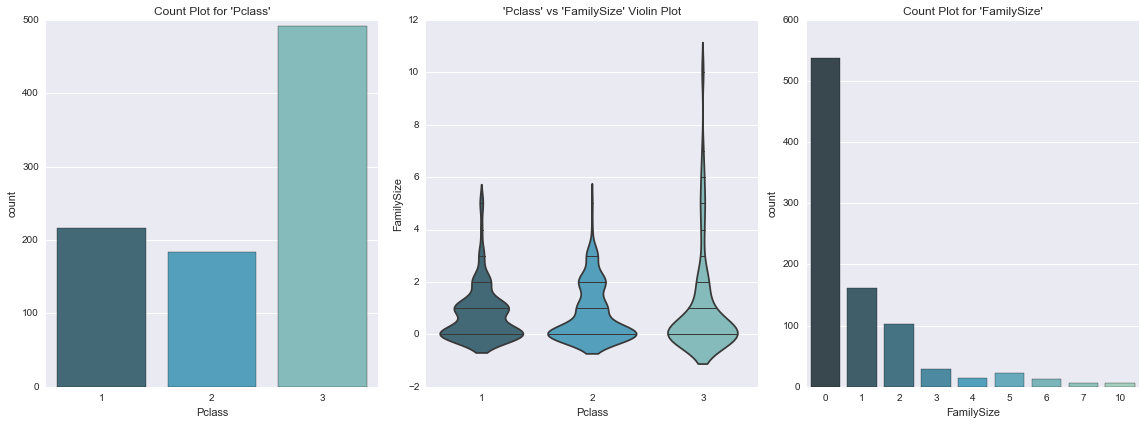

Frequency Table:


FamilySize,0,1,2,3,4,5,6,7,10,All
Pclass,,,,,,,,,,
1,109,70,24,7,2,4,0,0,0,216
2,104,34,31,13,1,1,0,0,0,184
3,324,57,47,9,12,17,12,6,7,491
All,537,161,102,29,15,22,12,6,7,891


Normalised Frequency Table:


FamilySize,0,1,2,3,4,5,6,7,10,All
Pclass,,,,,,,,,,
1,0.202980,0.434783,0.235294,0.241379,0.133333,0.181818,0,0,0,0.242424
2,0.193669,0.211180,0.303922,0.448276,0.066667,0.045455,0,0,0,0.206510
3,0.603352,0.354037,0.460784,0.310345,0.800000,0.772727,1,1,1,0.551066
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1,1,1,1.000000


χ²: Pclass and FamilySize
H0: The null hypothesis for this χ² test is that Pclass and FamilySize are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and FamilySize are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 3.48927313495e-12 and a χ² statistic of 89.2150566031 with 16 degrees of freedom we
reject the null hypothesis and accept that Pclass and FamilySize are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and FamilySize has a value of 0.223751125126
equating to a small to medium effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [7]:
descriptive_statistics_of_numeric_series('Pclass', "Socio-Economic Status (Pclass)")
descriptive_statistics_of_numeric_series('FamilySize', "Family Onboard (FamilySize)")
visual_analysis_of_two_categorical_variables('Pclass', 'FamilySize')

print "Frequency Table:"
display(table_of_frequencies('Pclass', 'FamilySize', mod_titanic_df, margins=True))

print "Normalised Frequency Table:"
display(table_of_frequencies('Pclass', 'FamilySize', mod_titanic_df, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Pclass', 'FamilySize')

It does appear that there is a relationship between socio-economic status and family size on board the Titanic. The χ² test for these two variables confirms this with a 99.9% level of confidence. The value of Cramer's V suggests that the there is a small to medium effect size between the two variables. In general, the trend suggests that given a passenger from this data set, they are more likely to have the lowest socio-economic status than not if their family size is either zero or larger than 3 while first class passenegers who have other family members on board are far more likely to have only one family member with them rather than more than one (70 vs 37).

## Is there a relationship between socio-economic status and where the passengers embarked?

Summary Statistics for Socio-Economic Status (Pclass)
Median: 3.0
Mean: 2.30864197531
Standard Deviation: 0.836071240977


To aid this analysis, the three ports of embarkation are Cherbourg (C), Queenstown (Q) and Southampton (S).


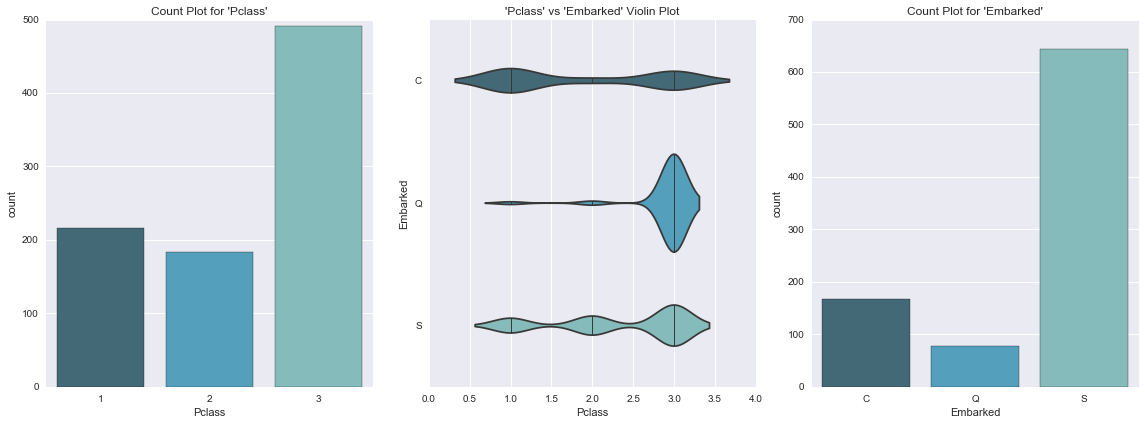

Frequency Table:


Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,216
2,17,3,164,184
3,66,72,353,491
All,168,77,644,891


Normalised (by column) Frequency Table:


Embarked,C,Q,S,All
Pclass,,,,
1,0.505952,0.025974,0.197205,0.242424
2,0.101190,0.038961,0.254658,0.206510
3,0.392857,0.935065,0.548137,0.551066
All,1.000000,1.000000,1.000000,1.000000


Normalised (by row) Frequency Table:


Embarked,C,Q,S,All
Pclass,,,,
1,0.393519,0.009259,0.587963,1
2,0.092391,0.016304,0.891304,1
3,0.134420,0.146640,0.718941,1
All,0.188552,0.086420,0.722783,1


χ²: Pclass and Embarked
H0: The null hypothesis for this χ² test is that Pclass and Embarked are independent of each other.
HA: The alternative hypothesis for this χ² test is that Pclass and Embarked are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 8.43526781989e-26 and a χ² statistic of 123.75190953 with 4 degrees of freedom we
reject the null hypothesis and accept that Pclass and Embarked are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Pclass and Embarked has a value of 0.263525171492
equating to a small to medium effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [8]:
descriptive_statistics_of_numeric_series('Pclass', "Socio-Economic Status (Pclass)")

print "To aid this analysis, the three ports of embarkation are Cherbourg (C), Queenstown (Q) and Southampton (S)."

visual_analysis_of_two_categorical_variables('Pclass', 'Embarked')

print "Frequency Table:"
display(table_of_frequencies('Pclass', 'Embarked', mod_titanic_df, margins=True))

print "Normalised (by column) Frequency Table:"
display(table_of_frequencies('Pclass', 'Embarked', mod_titanic_df, margins=True, normalise=True))

print "Normalised (by row) Frequency Table:"
display(table_of_frequencies('Pclass', 'Embarked', mod_titanic_df, margins=True, normalise=True, axis='rows'))

chi_squared_and_carmers_v_anlysis('Pclass', 'Embarked')

There is a relationship between 'Pclass' and 'Embarked'. The χ² resulted in a rejection of the null hypothesis with a 99.9% confidence interval and the value of Cramer's V suggests there is  a small to medium effect size. Interestingly, more than 93% of passenegers who embarked from Queenstown were 3rd class passengers. The large majority of passengers embarked from Southampton skewing the whole socio-economic distribution toward that of the passnegers from that port.

## Were passengers with higher socio-economic status more likely to survive?

Summary Statistics for Survived
Median: 0.0
Mean: 0.383838383838
Standard Deviation: 0.486592454265




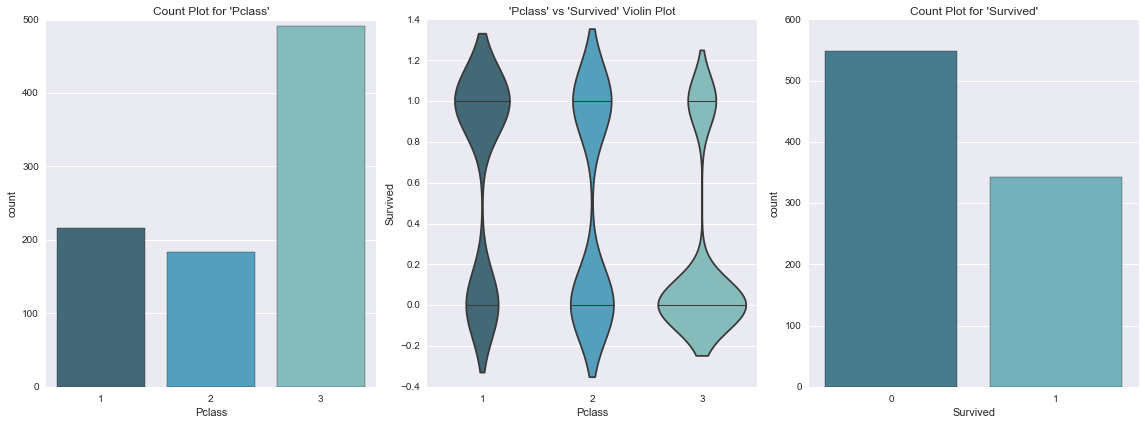

Frequency Table:


Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


Normalised Frequency Table:


Pclass,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838
All,1.00000,1.000000,1.000000,1.000000


χ²: Survived and Pclass
H0: The null hypothesis for this χ² test is that Survived and Pclass are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and Pclass are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 4.5492517113e-23 and a χ² statistic of 102.888988757 with 2 degrees of freedom we
reject the null hypothesis and accept that Survived and Pclass are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and Pclass has a value of 0.339817388005
equating to a medium effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [9]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
visual_analysis_of_two_categorical_variables('Pclass', 'Survived')

print "Frequency Table:"
display(table_of_frequencies('Survived', 'Pclass', mod_titanic_df, margins=True))

print "Normalised Frequency Table:"
display(table_of_frequencies('Survived', 'Pclass', mod_titanic_df, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Survived', 'Pclass')

Sadly, passengers with higher socio-econmic status were more likely to survive. This could be in part due to the fact that first class cabins were closer to the life boats than third class cabins. The χ² test of indepence resulted in a rejection of the null hypothesis inidcating that that 'Survived' and 'Pclass' are dependent to a 99.9% degree of confidence. The value of Cramer's V indicates that the dependence between these variables has a medium effect size. Ultimately, the relationship is quite clear. A passenger in first class is twice as likely to have survived than not, a second class passenger was just about as likley to survive or not where as a third class passenger was three times as likely not to survive as they were to survive. The true cause of this pattern is open to speculation, but the relationship is clear.

## Were men or women more likely to survive?

Summary Statistics for Survived
Median: 0.0
Mean: 0.383838383838
Standard Deviation: 0.486592454265




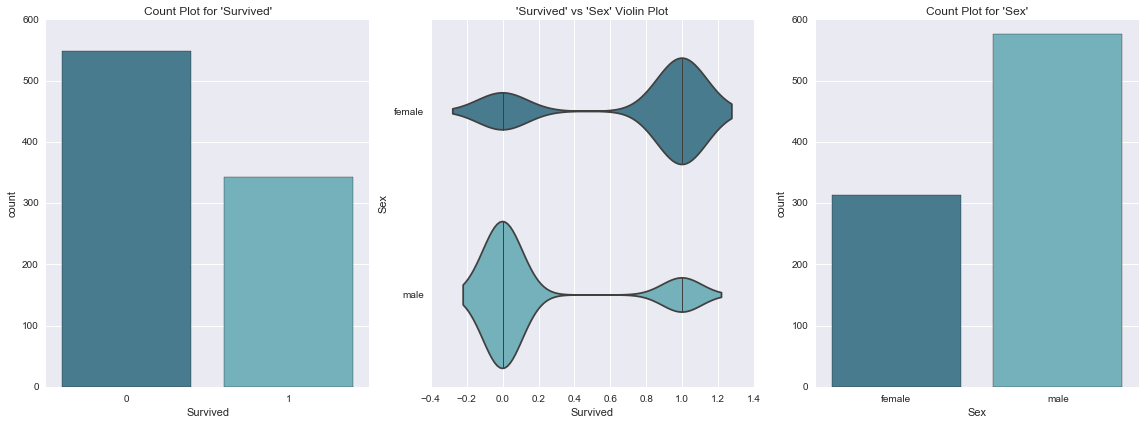

Frequency Table:


Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


Normalised Frequency Table:


Sex,female,male,All
Survived,,,
0,0.257962,0.811092,0.616162
1,0.742038,0.188908,0.383838
All,1.000000,1.000000,1.000000


χ²: Survived and Sex
H0: The null hypothesis for this χ² test is that Survived and Sex are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and Sex are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 1.19735706278e-58 and a χ² statistic of 260.717020167 with 1 degree of freedom we
reject the null hypothesis and accept that Survived and Sex are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and Sex has a value of 0.540935943447
equating to a large effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [10]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
visual_analysis_of_two_categorical_variables('Survived', 'Sex')

print "Frequency Table:"
display(table_of_frequencies('Survived', 'Sex', mod_titanic_df, margins=True))

print "Normalised Frequency Table:"
display(table_of_frequencies('Survived', 'Sex', mod_titanic_df, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Survived', 'Sex')

Of all the relationships analysed here, the relationship between whether a passenger survived and their gender has the largest effect size as determined by the calculation of Cramer's V. It is the only relationship that has been deemed to have a large effect size. The χ² statistic is so large that the p-value has 57 leading zeroes! A female passenger is three times more likely to have survived than not while male passenegers are four times more likely not to have survived than survived. It is very likely that it is this relationship that has perpetuated the idea of 'women and children first' when saving passengers on a sinking ship although contemporay evidence suggests that the sinking of the Titanic may be anomolous in this trend [6].

## Were passengers of certain ages likely to survive?

Summary Statistics for Survived
Median: 0.0
Mean: 0.383838383838
Standard Deviation: 0.486592454265


Summary Statistics for Age
Median: 28.0
Mean: 29.6991176471
Standard Deviation: 14.5264973323




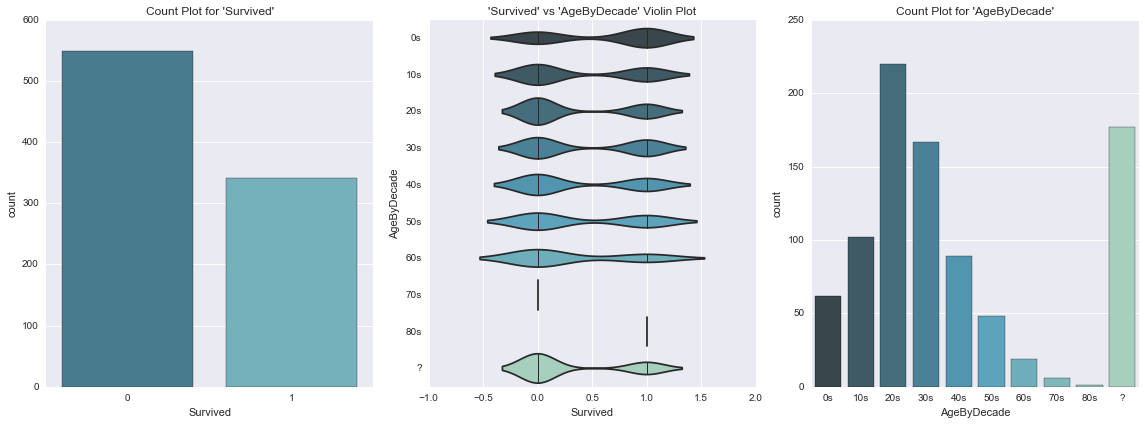

Frequency Table:


AgeByDecade,0s,10s,20s,30s,40s,50s,60s,70s,80s,?,All
Survived,,,,,,,,,,,
0,24,61,143,94,55,28,13,6,0,125,549
1,38,41,77,73,34,20,6,0,1,52,342
All,62,102,220,167,89,48,19,6,1,177,891


Normalised Frequency Table:


AgeByDecade,0s,10s,20s,30s,40s,50s,60s,70s,80s,?,All
Survived,,,,,,,,,,,
0,0.387097,0.598039,0.65,0.562874,0.617978,0.583333,0.684211,1,0,0.706215,0.616162
1,0.612903,0.401961,0.35,0.437126,0.382022,0.416667,0.315789,0,1,0.293785,0.383838
All,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1,1,1.000000,1.000000


χ²: Survived and AgeByDecade
H0: The null hypothesis for this χ² test is that Survived and AgeByDecade are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and AgeByDecade are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 0.000655371188428 and a χ² statistic of 28.9710350222 with 9 degrees of freedom we
reject the null hypothesis and accept that Survived and AgeByDecade are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and AgeByDecade has a value of 0.18031969061
equating to a small effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [11]:
descriptive_statistics_of_numeric_series('Survived', "Survived")
descriptive_statistics_of_numeric_series('Age', 'Age')
visual_analysis_of_two_categorical_variables('Survived', 'AgeByDecade')

print "Frequency Table:"
display(table_of_frequencies('Survived', 'AgeByDecade', mod_titanic_df, margins=True))

print "Normalised Frequency Table:"
display(table_of_frequencies('Survived', 'AgeByDecade', mod_titanic_df, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Survived', 'AgeByDecade')

As a whole, the effect size of a passenger's decade of age on whether they survived is small (as interpreted from the value of Cramer's V for these two variables). According to the χ² statistic, the two variables have been found to be dependent. It is interesting to note that for every category of age where there is more than one sample there is only one category where passengers are more likley to survive than nat and that is for children under the age of 10. Based on the violin plots and normalised frequency table, it appears that passengers were worst off if they were in their 20s or 60s. Fewer people in their 60s survived, but the total sample of passengers in their 60s is smaller than that of passengers in their 20s. It is hard to draw any conclusions about passnegers in their 70s and 80s as the sample sizes are so small.

It is not clear whether there is a true relationship, even if it is small, between 'AgeByDecade' and 'Survived' or whther the relationship is confounded by the records with missing ages and the records with very high ages (70s and 80s) that not only have very few instances but also communicate a very strong signal toward survivorship as there are not any passengers in their 70's who survived and the only passenger in their 80s survived. The easiest way to determine which is the case is to rerun the analysis including only passengers who have an age less than 70 and compare the results.

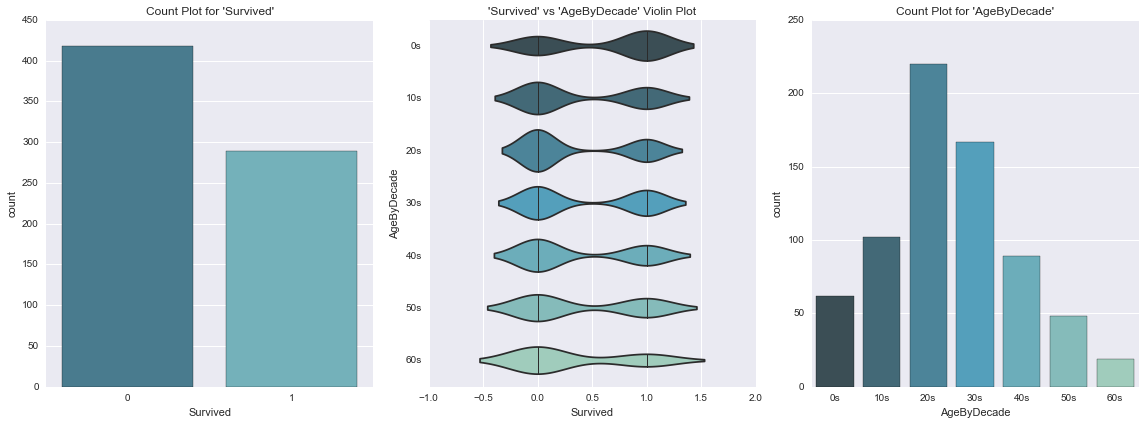

Normalised Frequency Table:


AgeByDecade,0s,10s,20s,30s,40s,50s,60s,All
Survived,,,,,,,,
0,0.387097,0.598039,0.65,0.562874,0.617978,0.583333,0.684211,0.591231
1,0.612903,0.401961,0.35,0.437126,0.382022,0.416667,0.315789,0.408769
All,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000


χ²: Survived and AgeByDecade
H0: The null hypothesis for this χ² test is that Survived and AgeByDecade are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and AgeByDecade are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 0.0176003570258 and a χ² statistic of 15.3649632646 with 6 degrees of freedom we
fail to reject the null hypothesis that Survived and AgeByDecade are independent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and AgeByDecade has a value of 0.147419880979
equating to a small effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [12]:
titanic_df_without_missing_ages = mod_titanic_df[(mod_titanic_df['Age'] < 70)]
visual_analysis_of_two_categorical_variables('Survived', 'AgeByDecade', titanic_df_without_missing_ages)

print "Normalised Frequency Table:"
display(table_of_frequencies('Survived', 'AgeByDecade', titanic_df_without_missing_ages, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Survived', 'AgeByDecade', titanic_df_without_missing_ages)

By removing passenegers who were 70 or older and those of unkown age, the χ² test shifts from rejecting the null hypothesis to failing to reject the null hypothesis at the 99.9% degree of confidence used in this investigation. It is worth noting that the p-value for the χ² is still small by normal standard given it is less than 0.05, but considering that the largest p-value for all of the other variables tested has 11 leading zeroes, a value of 0.0176 is massive by comparison. In the end, it is not consclusive evidence that there is not a relationship between 'Survived' and 'AgeByDecade', but it is clear that the survivorship of the oldest passenegers and the passenghers of unkown age has a noticeable impact on the dependence between these variables. 

## Is a passenger's socio-economic status, gender, or age the better indicator of their survival?

One way to compare the impact of a passenger's socio-economic status, gender and age as different indicators that might suggest whther that passenger was likely to survive the sinking of the Titanic or not is to compare the Cramer's V values for each of those variables. As a part of the analysis of the last few questions, these values have already been calculated. As we have already found, a passenger's gender acts as very strong indicator ('large' effect size given a Cramer's V of 0.54) of survival where women were far more likely to survive while the oposite was true for men. The second best indicator for survival of the three analsysed was socio-econmic status.

## Conclussions and Further Analysis

The analysis above suggests that the most likely passengers to survive were rich women. We can do further anlysis to see how much better off rich women were compared to less well off women and men of varying socio econmic status.

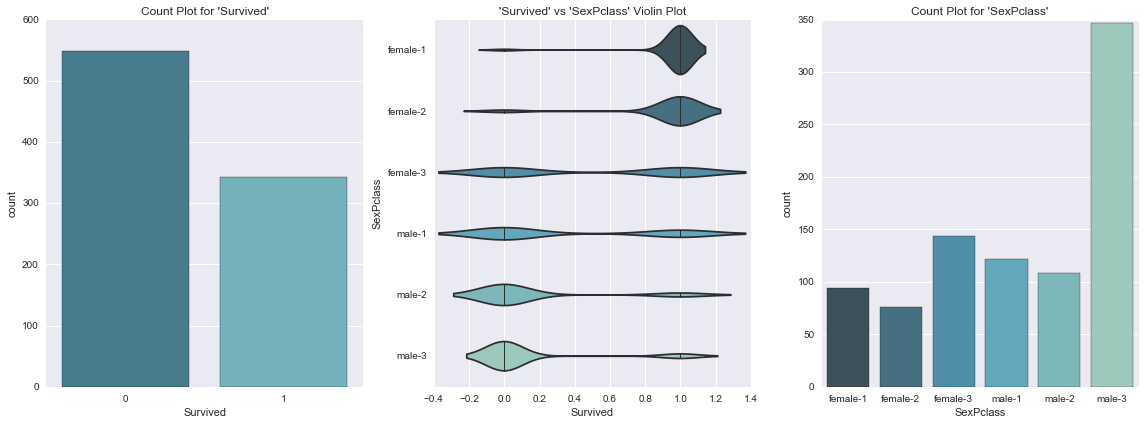

Frequency Table:


SexPclass,female-1,female-2,female-3,male-1,male-2,male-3,All
Survived,,,,,,,
0,3,6,72,77,91,300,549
1,91,70,72,45,17,47,342
All,94,76,144,122,108,347,891


Normalised Frequency Table:


SexPclass,female-1,female-2,female-3,male-1,male-2,male-3,All
Survived,,,,,,,
0,0.031915,0.078947,0.5,0.631148,0.842593,0.864553,0.616162
1,0.968085,0.921053,0.5,0.368852,0.157407,0.135447,0.383838
All,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


χ²: Survived and SexPclass
H0: The null hypothesis for this χ² test is that Survived and SexPclass are independent of each other.
HA: The alternative hypothesis for this χ² test is that Survived and SexPclass are in some way dependent.
For this test, we are considering an alpha level 0.001 allowing for 99.9% level of confidence.
-----------------------------------------------------------------------------------------------------
With a p-value of 1.25230734736e-73 and a χ² statistic of 350.675308396 with 5 degrees of freedom we
reject the null hypothesis and accept that Survived and SexPclass are in some way dependent [3].
-----------------------------------------------------------------------------------------------------
The Cramer's V measure of association for Survived and SexPclass has a value of 0.627355546213
equating to a large effect size [4][5].
-----------------------------------------------------------------------------------------------------


In [13]:
df_with_combined_sex_and_pclass = mod_titanic_df.copy()
df_with_combined_sex_and_pclass['SexPclass'] = mod_titanic_df['Sex'] + "-" + mod_titanic_df['Pclass'].apply(str)
visual_analysis_of_two_categorical_variables('Survived', 'SexPclass', df_with_combined_sex_and_pclass)

print "Frequency Table:"
display(table_of_frequencies('Survived', 'SexPclass', df_with_combined_sex_and_pclass, margins=True))

print "Normalised Frequency Table:"
display(table_of_frequencies('Survived', 'SexPclass', df_with_combined_sex_and_pclass, margins=True, normalise=True))

chi_squared_and_carmers_v_anlysis('Survived', 'SexPclass', df_with_combined_sex_and_pclass)

This further analysis confirms the suspicion that the safest passenegers were rich women. Of the females in first class, all but 3 survived while exactly half of the 144 females in 3rd class survived. The χ² test with the combination of 'Sex' and 'Pclass' compared to 'Survived' is even more definitive than the previous analysis where only 'Sex' was considered. The Cramer's V measure has also increased from 0.54 to 0.63. It would be inappropriate to claim that being rich and or being female *caused* these passenges to survive, but is likely that being rich and being female *afforded these passenegers* the opportunity to survive. It is likely that first class passengers were closer to the life boats so were more likely to to have the time to safely escape the sinking ship [7]. It is also likely that the prioritisation of 'women and children first' allowed females to escape while there was the opportunity to do so [8]. The combination of these two factors are a likely explanation for why females in first class had nearly a 97% survival rate. Of course, it is impossible to be certain of this without the presentation of considerably more information.   

### References

[1] "Harland & Wolff : Titanic Guarantee Group | Encyclopedia Titanica." Encyclopedia Titanica. Accessed March 19, 2016. http://www.encyclopedia-titanica.org/titanic-guarantee-group/.

[2] Wikipedia contributors, "Contingency table," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Contingency_table&oldid=708180357 (accessed March 19, 2016).

[3] Wikipedia contributors, "Chi-squared test," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=710514353 (accessed March 19, 2016).

[4] Wikipedia contributors, "Cramér's V," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Cram%C3%A9r%27s_V&oldid=705563259 (accessed March 14, 2016).

[5] Wikipedia contributors, "Effect size," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Effect_size&oldid=706273103 (accessed March 14, 2016).

[6] Pasick, Adam. "“Women and Children First” Is a Maritime Disaster Myth-it’s Really “every Man for Himself”." Quartz. January 6, 2015. Accessed March 19, 2016. http://qz.com/321827/women-and-children-first-is-a-maritime-disaster-myth-its-really-every-man-for-himself/.

[7] "Titanic Deckplans." Encyclopedia Titanica. Accessed March 19, 2016. http://www.encyclopedia-titanica.org/titanic-deckplans/.

[8] Wikipedia contributors, "Women and children first," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Women_and_children_first&oldid=709932851 (accessed March 19, 2016).